<a href="https://colab.research.google.com/github/WillianCella/ModelosDeAprendizadoSupervisionado/blob/main/Trabalho_1_%E2%80%93_Modelos_de_Aprendizado_Supervisionado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   Aureo Nildo X. dos Santos Jr.
*   Luciano Semicheche
*   Willian M. Cella



A base de dados *poker-hand-testing* foi extraída de: https://archive-beta.ics.uci.edu/dataset/158/poker+hand
### S = Suits(Naipes) Valores de 1 a 4
### C = Cards(Cartas) Valores de 1 a 13
#### Cartas Maos
   - S1 = Naipes = Heart♥️, Spades♠️, Diamonds♦️, Clubs♣️
   - C1 = Valores= A, 2, 3, 4, 5, 6, 7, 8, 9, 10 , J, Q, K
   - S2 = Naipes = Heart♥️, Spades♠️, Diamonds♦️, Clubs♣️
   - C2 = Valores= A, 2, 3, 4, 5, 6, 7, 8, 9, 10 , J, Q, K
   - S3 = Naipes = Heart♥️, Spades♠️, Diamonds♦️, Clubs♣️
   - C3 = Valores= A, 2, 3, 4, 5, 6, 7, 8, 9, 10 , J, Q, K
   - S4 = Naipes = Heart♥️, Spades♠️, Diamonds♦️, Clubs♣️
   - C4 = Valores= A, 2, 3, 4, 5, 6, 7, 8, 9, 10 , J, Q, K
   - S5 = Naipes = Heart♥️, Spades♠️, Diamonds♦️, Clubs♣️
   - C5 = Valores= A, 2, 3, 4, 5, 6, 7, 8, 9, 10 , J, Q, K
#### Jogadas possiveis   
   - CLASS = 0, 1, 2, 3, 4, 5, 6, 7, 8, 9

#### DESCRICAO CLASSES
- 0: Nothing in hand; not a recognized poker hand

- 1: One pair; one pair of equal ranks within five cards

- 2: Two pairs; two pairs of equal ranks within five cards

- 3: Three of a kind; three equal ranks within five cards

- 4: Straight; five cards, sequentially ranked with no gaps

- 5: Flush; five cards with the same suit

- 6: Full house; pair + different rank three of a kind

- 7: Four of a kind; four equal ranks within five cards

- 8: Straight flush; straight + flush

- 9: Royal flush; {Ace, King, Queen, Jack, Ten} + flush

In [86]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [87]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [88]:
dados = pd.read_csv("/content/drive/MyDrive/Shared/poker-hand-testing3.csv", sep = ';')
#dados = pd.read_csv("poker-hand-testing3.csv", sep=';')
x = dados.iloc[:, :10].values # Cria uma matriz com todos os valores exceto as classes
y = dados['Class'].values     # Cria um array com os valores das classes

# Cria um dataFrame com a matriz de dados com os nomes de todas as colunas exceto a última
dt = pd.DataFrame(dados)
df_temp = pd.DataFrame(dados,columns=dados.columns[:-1])
df_temp
dt.head(10)

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,Class
0,1,1,1,13,2,4,2,3,1,12,0
1,3,12,3,2,3,11,4,5,2,5,1
2,1,9,4,6,1,4,3,2,3,9,1
3,1,4,3,13,2,13,2,1,3,6,1
4,3,10,2,7,1,2,2,11,4,9,0
5,1,3,4,5,3,4,1,12,4,6,0
6,2,6,4,11,2,3,4,9,1,7,0
7,3,2,4,9,3,7,4,3,4,5,0
8,4,4,3,13,1,8,3,9,3,10,0
9,1,9,3,8,4,4,1,7,3,5,0


In [89]:
dados.describe()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,Class
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.442000,7.235000,2.489000,6.964000,2.525000,7.278000,2.524000,7.101000,2.458000,6.870000,1.897000
std,1.121559,3.826018,1.136297,3.715981,1.118314,3.757237,1.123693,3.721915,1.087851,3.793084,2.227409
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,4.000000,1.000000,4.000000,2.000000,4.000000,2.000000,4.000000,2.000000,3.000000,0.000000
50%,2.000000,7.000000,3.000000,7.000000,3.000000,7.000000,3.000000,7.000000,2.000000,7.000000,1.000000
75%,3.000000,11.000000,4.000000,10.000000,4.000000,11.000000,4.000000,10.000000,3.000000,10.000000,3.000000
max,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,9.000000


In [90]:
dados.shape

(1000, 11)

In [91]:
from sklearn.model_selection import train_test_split
x_treino,x_teste,y_treino,y_teste=train_test_split(df_temp,dados['Class'],test_size=0.5,stratify=dados['Class'],shuffle=True)
x_validacao,x_teste,y_validacao,y_teste=train_test_split(x_teste,y_teste,test_size=0.5, stratify = y_teste)

In [92]:
# KNN
knn_best_result = []
knn_result = []

for i in range(1, 51):
  for j in ["uniform","distance"]:
   KNN = KNeighborsClassifier(n_neighbors=i,weights=j)
   KNN.fit(x_treino,y_treino)
   pred = KNN.predict(x_validacao)
   result = accuracy_score(y_validacao, pred)
   knn_result.append({
       'acc': result,
       'weight': j,
       'kneighbor': i,
       'predict': pred})

knn_result.sort(key=lambda x: x['acc']) # orderna pela % acuracia
knn_best_result = knn_result[-1:] # melhor resultado

df_knn = pd.DataFrame.from_dict(knn_best_result)

# Busca a melhor predição
knn_pred = df_knn['predict'].values[0]
display(df_knn[['acc','weight','kneighbor']])

,acc,weight,kneighbor
0,0.5,distance,29


In [93]:
# DT - Arvore de descisao 
dt_result = []

for i in range(1, 11):
  treeD = DecisionTreeClassifier(max_depth=10, min_samples_split=3) # utilizando critério gini e splitter best - default
  treeD = treeD.fit(x_treino, y_treino)
  predTree = treeD.predict(x_validacao)
  resultTree = accuracy_score(y_validacao, predTree)
  dt_result.append({
       'acc': resultTree,
       'predict': predTree})

dt_result.sort(key=lambda x: x['acc']) # orderna pela % acuracia
df_dt = pd.DataFrame.from_dict(dt_result[-1:])

dt_pred = df_dt['predict'].values[0]
display(df_dt[['acc']])


,acc
0,0.36


In [94]:
# RF - Floresta randomica
rf_best_result = []
rf_result = []

max_depth = 10
min_samples_split = 3
for i in range(1, 11):
    for estimado in range(50, 250, 50):
        rndForest = RandomForestClassifier(n_estimators=estimado, max_depth=max_depth, min_samples_split=min_samples_split)
        rndForest = rndForest.fit(x_treino, y_treino)
        predictRF = rndForest.predict(x_validacao)
        accRF = accuracy_score(y_validacao, predictRF)
        rf_result.append({
            'acc': accRF,
            'estimado': estimado
        })
res = {}
for rf in rf_result:
    if rf['estimado'] not in res.keys():
         res.setdefault(rf['estimado'], [])
    if rf['estimado'] in res.keys():
        res[rf['estimado']].append(rf['acc'])

for k, v in res.items():
  res[k] = max(v)

rf_result = { max(res) : res[max(res)]}
pd.DataFrame.from_dict([rf_result])

,200
0,0.456


In [95]:
# SVM 
svm_best_result = []
svm_result = []

from sklearn.svm import SVC
for sm in range (1, 11):
  for kern in ['linear', 'poly', 'rbf','sigmoid']:
    SVM = SVC(kernel=kern, C=sm/10) ## instanciando o classificador e seus parametros
    SVM.fit(x_treino,y_treino) ## treinando o classificador
    predictSVM = SVM.predict(x_validacao) ## colhendo a opiniao do classificador
    accSVM = accuracy_score(y_validacao, predictSVM) # calc a acuracia
    svm_result.append({
            'acc': accSVM,
            'C': sm/10,
            'kern': kern,
            'predict': predictSVM
        })
svm_result.sort(key=lambda x: x['acc']) # orderna pela % acuracia
df_svm = pd.DataFrame.from_dict(svm_result[-1:]) # melhor resultado

svm_pred = df_svm['predict'].values[0]
display(df_svm[['acc','C','kern']])

,acc,C,kern
0,0.44,1.0,poly


In [96]:
df_knn

,acc,weight,kneighbor,predict
0,0.5,distance,29,"[0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 0, 0, 0, 0, 0, ..."


KNN: 
f-measure :  0.3399822896900696
acuracia :  0.484
auc :  0.4139555555555555
f-measure :  0.3373093219604376
acuracia :  0.468
auc :  0.4634666666666667
f-measure :  0.3254231530845392
acuracia :  0.464
auc :  0.3808
f-measure :  0.3359109919462951
acuracia :  0.476
auc :  0.4876444444444445
f-measure :  0.3210327352989426
acuracia :  0.46
auc :  0.4274666666666666
f-measure :  0.3208661202185792
acuracia :  0.46
auc :  0.5315555555555557
f-measure :  0.3166521532865953
acuracia :  0.464
auc :  0.5435555555555556
f-measure :  0.3067333264184213
acuracia :  0.448
auc :  0.5218666666666666
f-measure :  0.3214467605633803
acuracia :  0.464
auc :  0.5008
f-measure :  0.3474185977764925
acuracia :  0.488
auc :  0.5107555555555556


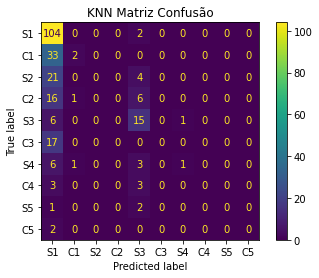

In [97]:
## KNN - Classificação
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

knn_clf = []
knn =  KNeighborsClassifier(n_neighbors=df_knn['kneighbor'][0],weights=df_knn['weight'][0])
for i in range (1, 11):
  x_treino,x_teste,y_treino,y_teste=train_test_split(df_temp,dados['Class'],test_size=0.5,stratify=dados['Class'],shuffle=True)
  x_validacao,x_teste,y_validacao,y_teste=train_test_split(x_teste,y_teste,test_size=0.5, stratify = y_teste)
  
  knn.fit(x_treino,y_treino)
  predict = knn.predict(x_teste)
  fmeasure = metrics.f1_score(y_teste, predict, average='weighted') # F-Measure
  acuracia = accuracy_score(y_teste, predict) # Acurácia
  y_score = knn.predict_proba(x_teste)[:,1] # Taxa de verdadeiro positivo
  fpr, tpr, thresholds = metrics.roc_curve(y_teste,y_score,pos_label=2)

  knn_clf.append({
      'f-measure': fmeasure,
      'acuracia': acuracia,
      'auc': metrics.auc(fpr,tpr)
  })

disp = ConfusionMatrixDisplay.from_estimator(knn, x_teste, y_teste, display_labels=dados.columns[:-1])
disp.ax_.set_title('KNN Matriz Confusão')
print("KNN: ")
for i, knn in enumerate(knn_clf):
  for k, v in knn.items():
    print(k,': ',v)


In [98]:
## DT - Árvore de decisão - Classificação
dt_clf = []
dt =  DecisionTreeClassifier(max_depth=10, min_samples_split=3)
for i in range (1, 11):
  x_treino,x_teste,y_treino,y_teste=train_test_split(df_temp,dados['Class'],test_size=0.5,stratify=dados['Class'],shuffle=True)
  x_validacao,x_teste,y_validacao,y_teste=train_test_split(x_teste,y_teste,test_size=0.5, stratify = y_teste)
  
  dt.fit(x_treino,y_treino)
  predTree = dt.predict(x_teste)
  fmeasure = metrics.f1_score(y_teste, predict, average='weighted') # F-Measure
  acuracia = accuracy_score(y_teste, predict) # Acurácia
  y_score = dt.predict_proba(x_teste)[:,1] # Taxa de verdadeiro positivo
  fpr, tpr, thresholds = metrics.roc_curve(y_teste,y_score,pos_label=2)

  dt_clf.append({
      'f-measure': fmeasure,
      'acuracia': acuracia,
      'auc': metrics.auc(fpr,tpr)
  })

print("DT - Árvore de decisão: ")
for i, dt in enumerate(dt_clf):
  for k, v in dt.items():
    print(k,': ',v)


DT - Árvore de decisão: 
f-measure :  0.2785413919413919
acuracia :  0.404
auc :  0.5369777777777778
f-measure :  0.23482539682539685
acuracia :  0.348
auc :  0.5478222222222222
f-measure :  0.2545592340149302
acuracia :  0.368
auc :  0.5731555555555556
f-measure :  0.26232378414390406
acuracia :  0.384
auc :  0.5005530973451328
f-measure :  0.25008860759493673
acuracia :  0.368
auc :  0.552088888888889
f-measure :  0.24320952380952382
acuracia :  0.36
auc :  0.4301333333333333
f-measure :  0.24408860759493675
acuracia :  0.36
auc :  0.559288888888889
f-measure :  0.2483246089908315
acuracia :  0.36
auc :  0.5367809734513275
f-measure :  0.25214285714285717
acuracia :  0.368
auc :  0.46657777777777776
f-measure :  0.2600207184628237
acuracia :  0.384
auc :  0.4616888888888889


In [99]:
## RF - Random Forest - Classificação
rf_clf = []
for i in range (1, 11):
    x_treino,x_teste,y_treino,y_teste=train_test_split(df_temp,dados['Class'],test_size=0.5,stratify=dados['Class'],shuffle=True)
    x_validacao,x_teste,y_validacao,y_teste=train_test_split(x_teste,y_teste,test_size=0.5, stratify = y_teste)
  
    rf = RandomForestClassifier(n_estimators=list(rf_result.keys())[0], max_depth=max_depth, min_samples_split=min_samples_split)
    rf = rf.fit(x_treino, y_treino)
    predictRF = rf.predict(x_validacao)
    accRF = accuracy_score(y_validacao, predictRF)
    fmeasure = metrics.f1_score(y_teste, predictRF, average='weighted') # F-Measure
    y_score = rf.predict_proba(x_teste)[:,1] # Taxa de verdadeiro positivo
    fpr, tpr, thresholds = metrics.roc_curve(y_teste,y_score,pos_label=2)

    rf_clf.append({
        'f-measure': fmeasure,
        'acuracia': accRF,
        'auc': metrics.auc(fpr,tpr)
    })


print("RF - Random Forest: ")
for i, dt in enumerate(rf_clf):
  for k, v in dt.items():
    print(k,': ',v)

RF - Random Forest: 
f-measure :  0.24895238095238095
acuracia :  0.44
auc :  0.5333333333333334
f-measure :  0.2370186335403727
acuracia :  0.44
auc :  0.5004444444444445
f-measure :  0.28047162187210384
acuracia :  0.448
auc :  0.5230222222222222
f-measure :  0.25343806646525685
acuracia :  0.444
auc :  0.48598820058997044
f-measure :  0.2700653289679838
acuracia :  0.452
auc :  0.5964233038348083
f-measure :  0.22700307692307692
acuracia :  0.456
auc :  0.4897777777777778
f-measure :  0.2568938289780395
acuracia :  0.44
auc :  0.6049777777777778
f-measure :  0.26689823708206684
acuracia :  0.456
auc :  0.5084444444444445
f-measure :  0.27696841232841235
acuracia :  0.42
auc :  0.552
f-measure :  0.26409504392990635
acuracia :  0.428
auc :  0.40871111111111114


In [100]:
## SVM - Maquina de Vetores de Suporte - Classificação
svm_clf = []
for i in range (1, 11):
    x_treino,x_teste,y_treino,y_teste=train_test_split(df_temp,dados['Class'],test_size=0.5,stratify=dados['Class'],shuffle=True)
    x_validacao,x_teste,y_validacao,y_teste=train_test_split(x_teste,y_teste,test_size=0.5, stratify = y_teste)
  
    svm = SVC(kernel=df_svm['kern'][0], C=df_svm['C'][0], probability=True)
    svm = svm.fit(x_treino, y_treino)
    predictSVM = svm.predict(x_validacao)
    accSVM = accuracy_score(y_validacao, predictSVM)
    fmeasure = metrics.f1_score(y_teste, predictRF, average='weighted') # F-Measure
    y_score = svm.predict_proba(x_teste)[:,1] # Taxa de verdadeiro positivo
    fpr, tpr, thresholds = metrics.roc_curve(y_teste,y_score,pos_label=2)

    svm_clf.append({
        'f-measure': fmeasure,
        'acuracia': accSVM,
        'auc': metrics.auc(fpr,tpr)
    })


print("SVM - Maquina de Vetores de Suporte: ")
for i, dt in enumerate(svm_clf):
  for k, v in dt.items():
    print(k,': ',v)

SVM - Maquina de Vetores de Suporte: 
f-measure :  0.27139799038881607
acuracia :  0.44
auc :  0.6304
f-measure :  0.30247253628464643
acuracia :  0.424
auc :  0.47626666666666667
f-measure :  0.27025546466609424
acuracia :  0.44
auc :  0.49280973451327437
f-measure :  0.27423692187690923
acuracia :  0.468
auc :  0.5509333333333333
f-measure :  0.2441700262927257
acuracia :  0.472
auc :  0.5184365781710915
f-measure :  0.261637030545006
acuracia :  0.44
auc :  0.44906666666666667
f-measure :  0.26982768152093306
acuracia :  0.436
auc :  0.4799041297935103
f-measure :  0.24298703496630297
acuracia :  0.428
auc :  0.39214601769911506
f-measure :  0.2726701723634239
acuracia :  0.436
auc :  0.43395555555555554
f-measure :  0.2673613280908694
acuracia :  0.432
auc :  0.5315555555555556


In [101]:
from sklearn.naive_bayes import GaussianNB
## Gaussain - Naive Bayes Classificação
gb_clf = []
for i in range (1, 11):
    x_treino,x_teste,y_treino,y_teste=train_test_split(df_temp,dados['Class'],test_size=0.5,stratify=dados['Class'],shuffle=True)
    x_validacao,x_teste,y_validacao,y_teste=train_test_split(x_teste,y_teste,test_size=0.5, stratify = y_teste)

    NB = GaussianNB()
    NB = NB.fit(x_treino,y_treino)
    predictNB = NB.predict(x_validacao)
    accNB = accuracy_score(y_validacao, predictNB)
    fmeasure = metrics.f1_score(y_teste, predictNB, average='weighted')
    y_score = NB.predict_proba(x_teste)[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(y_teste,y_score,pos_label=2)

    gb_clf.append({
        'f-measure': fmeasure,
        'acuracia': accNB,
        'auc': metrics.auc(fpr,tpr)
    })

print("Gaussian - Classificacao: ")
for i, dt in enumerate(gb_clf):
  for k, v in dt.items():
    print(k,': ',v)

Gaussian - Classificacao: 
f-measure :  0.24682420749279538
acuracia :  0.412
auc :  0.5235555555555556
f-measure :  0.25534090909090906
acuracia :  0.42
auc :  0.4977777777777778
f-measure :  0.26483645443196
acuracia :  0.424
auc :  0.5313777777777777
f-measure :  0.2514802259887005
acuracia :  0.424
auc :  0.5507005899705015
f-measure :  0.2526303724928367
acuracia :  0.428
auc :  0.3980457227138643
f-measure :  0.2602775119617225
acuracia :  0.42
auc :  0.5453539823008849
f-measure :  0.24701714285714282
acuracia :  0.428
auc :  0.6238938053097345
f-measure :  0.24983569405099149
acuracia :  0.424
auc :  0.44035555555555556
f-measure :  0.25866666666666666
acuracia :  0.42
auc :  0.512
f-measure :  0.25223796033994333
acuracia :  0.432
auc :  0.43946666666666667


In [102]:
from pandas.core.computation.ops import DEFAULT_GLOBALS
# import matplotlib.pyplot as plt
# from statistics import mean

# from sklearn import metrics
# def plot_roc_curve(fper, tper,cor,classsificador):
#     plt.plot(fper, tper, color=cor, label=classsificador)
#     plt.plot([0, 1], [0, 1], color="green", linestyle='--')
#     plt.xlabel('Taxa de Falsos Positivos (FPR)')
#     plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
#     plt.title('Curva ROC')
#     plt.legend()
#     #plt.show()

# ## KNN
# knn_fpr = [mean(k['fpr']) for k in knn_clf]
# knn_tpr = [mean(k['tpr']) for k in knn_clf]
# print(knn_fpr)
# plot_roc_curve(knn_fpr, knn_tpr,"red","KNN")


# gb_fpr = mean([k['fpr'] for k in gb_clf])
# gb_tpr = mean([k['tpr'] for k in gb_clf])
# print("AUC NB: ",metrics.auc(gb_fpr, gb_tpr))
# plot_roc_curve(gb_fpr, gb_tpr,"blue","NaiVe Bayes")

# # DT - Árvore de decisão
# dt_fpr = mean([k['fpr'] for k in dt_clf])
# dt_tpr = mean([k['tpr'] for k in dt_clf])
# print("AUC DT: ",metrics.auc(dt_fpr,dt_tpr))
# plot_roc_curve(dt_fpr, dt_tpr,"black","DT")

# # RF - Randon Forest
# rf_fpr = mean([k['fpr'] for k in rf_clf])
# rf_tpr = mean([k['tpr'] for k in rf_clf])
# print("AUC RF: ",metrics.auc(fpr,tpr))
# plot_roc_curve(rf_fpr, rf_tpr,"yellow","RF")

# plt.show()
# extraindo os 10 valores do AUC de cada Classificador
knn_auc = [k['auc'] for k in knn_clf]
dt_auc  = [d['auc'] for d in dt_clf] 
rf_auc  = [r['auc'] for r in rf_clf] 
svm_auc = [s['auc'] for s in svm_clf]
gb_auc  = [g['auc'] for g in gb_clf]

from scipy import stats
print(stats.kruskal(knn_auc, rf_auc, dt_auc, svm_auc, gb_auc))
from scipy.stats import mannwhitneyu
print("==================================")
print("KNN")
knn_rf = mannwhitneyu(knn_auc, rf_auc, method="exact",alternative="two-sided")
print("KNN vs RF:", knn_rf )
knn_dt = mannwhitneyu(knn_auc, dt_auc, method="exact",alternative="two-sided")
print("KNN vs DT: ", knn_dt)
knn_svm = mannwhitneyu(knn_auc, svm_auc, method="exact",alternative="two-sided")
print("KNN vs SVM: ", knn_svm)
knn_gb = mannwhitneyu(knn_auc, gb_auc, method="exact",alternative="two-sided")
print("KNN vs NAIVE BAYES: ", knn_gb)

print("==================================")
print("ARVORE DESCISAO")
dt_rf = mannwhitneyu(dt_auc, rf_auc, method="exact",alternative="two-sided")
print("AD vs RF: ",dt_rf)
dt_knn = mannwhitneyu(dt_auc, knn_auc, method="exact",alternative="two-sided")
print("DT vs KNN: ", dt_knn)
dt_svm = mannwhitneyu(dt_auc, svm_auc, method="exact",alternative="two-sided")
print("KNN vs SVM: ", dt_svm)
dt_gb = mannwhitneyu(dt_auc, gb_auc, method="exact",alternative="two-sided")
print("KNN vs NAIVE. BAYES: ", dt_gb)

print("==================================")
print("FLORESTA RANDOMICA")
rf_knn = mannwhitneyu(rf_auc, knn_auc, method="exact",alternative="two-sided")
print("RF vs KNN: ",rf_knn)
rf_dt = mannwhitneyu(rf_auc, dt_auc, method="exact",alternative="two-sided")
print("RF vs DT: ", rf_dt)
rf_svm = mannwhitneyu(rf_auc, svm_auc, method="exact",alternative="two-sided")
print("RF vs SVM: ", rf_svm)
rf_gb = mannwhitneyu(rf_auc, gb_auc, method="exact",alternative="two-sided")
print("RF vs NAIVE. BAYES: ", rf_gb)


print("==================================")
print("SVM ")
svm_knn = mannwhitneyu(svm_auc, knn_auc, method="exact",alternative="two-sided")
print("SVM vs KNN: ",svm_knn)
svm_dt = mannwhitneyu(svm_auc, dt_auc, method="exact",alternative="two-sided")
print("SVM vs DT: ", svm_dt)
svm_rf = mannwhitneyu(svm_auc, rf_auc, method="exact",alternative="two-sided")
print("SVM vs RF: ", svm_rf)
svm_gb = mannwhitneyu(svm_auc, gb_auc, method="exact",alternative="two-sided")
print("SVM vs NAIVE. BAYES: ", svm_gb)

print("==================================")
print("NAIVES BAYES ")
gb_knn = mannwhitneyu(gb_auc, knn_auc, method="exact",alternative="two-sided")
print("NAIVE. BAYES vs KNN: ",gb_knn)
gb_dt = mannwhitneyu(gb_auc, dt_auc, method="exact",alternative="two-sided")
print("NAIVE. BAYES vs DT: ", gb_dt)
gb_rf = mannwhitneyu(gb_auc, rf_auc, method="exact",alternative="two-sided")
print("NAIVE. BAYES vs RF: ", gb_rf)
gb_svm = mannwhitneyu(gb_auc, svm_auc, method="exact",alternative="two-sided")
print("NAIVE. BAYES vs SVM:", gb_svm)

KruskalResult(statistic=3.903999999999968, pvalue=0.41915391263115376)
KNN
KNN vs RF: MannwhitneyuResult(statistic=32.0, pvalue=0.19031587607439004)
KNN vs DT:  MannwhitneyuResult(statistic=27.0, pvalue=0.08920955205784928)
KNN vs SVM:  MannwhitneyuResult(statistic=45.0, pvalue=0.7393643508194593)
KNN vs NAIVE BAYES:  MannwhitneyuResult(statistic=35.0, pvalue=0.27986100586719787)
ARVORE DESCISAO
AD vs RF:  MannwhitneyuResult(statistic=52.0, pvalue=0.9117971811470265)
DT vs KNN:  MannwhitneyuResult(statistic=73.0, pvalue=0.08920955205784928)
KNN vs SVM:  MannwhitneyuResult(statistic=64.0, pvalue=0.31499924224382436)
KNN vs NAIVE. BAYES:  MannwhitneyuResult(statistic=60.0, pvalue=0.48125094719521977)
FLORESTA RANDOMICA
RF vs KNN:  MannwhitneyuResult(statistic=68.0, pvalue=0.19031587607439004)
RF vs DT:  MannwhitneyuResult(statistic=48.0, pvalue=0.9117971811470265)
RF vs SVM:  MannwhitneyuResult(statistic=65.0, pvalue=0.27986100586719787)
RF vs NAIVE. BAYES:  MannwhitneyuResult(statistic=